In [18]:
import pandas as pd
df_wine = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)
df_wine.columns = ['Class label', 'Alcohol','Malic acid', 'Ash','Alcalinity of ash', 'Magnesium','Total phenols', 'Flavanoids','Nonflavanoid phenols','Proanthocyanins','Color intensity', 'Hue','OD280/OD315 of diluted wines','Proline']

In [19]:
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
X,y = df_wine.iloc[:,1:].values, df_wine.iloc[:,0].values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)
sc=StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)



In [20]:
#finding the eigen values and eigen vector using numpy
import numpy as np
cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vacs = np.linalg.eig(cov_mat)
#Although the numpy.linalg.eig function was designed to decompose nonsymmetric square matrices, you may  nd that it returns complex eigenvalues in certain cases.
#A related function, numpy.linalg.eigh, has been implemented to decompose Hermetian matrices, which is a numerically more stable approach to work with symmetric matrices such as the covariance matrix; numpy.linalg.eigh always returns real eigenvalues.
eigen_vals
eigen_vacs[:,0]

array([ 0.14669811, -0.24224554, -0.02993442, -0.25519002,  0.12079772,
        0.38934455,  0.42326486, -0.30634956,  0.30572219, -0.09869191,
        0.30032535,  0.36821154,  0.29259713])

The variance explained ratio of an eigenvalue λj is simply the fraction of an eigenvalue λj and the total sum of the eigenvalues:
λj /∑ λj

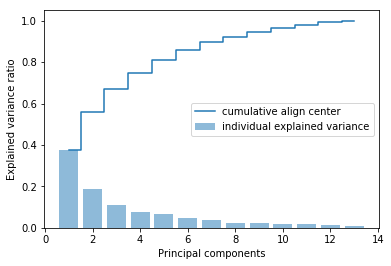

In [39]:
#Using the NumPy cumsum function, we can then calculate the cumulative sum of explained variances, which we will plot via matplotlib's step function:
tot = sum(eigen_vals)
var_exp = [(i/tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
import matplotlib.pyplot as plt
plt.bar(range(1,14), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,14), cum_var_exp, where = 'mid', label='cumulative align center')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()

In [22]:
eigen_pairs = [(np.abs(eigen_vals[i] ), eigen_vacs[:,i]) for i in range(len(eigen_vals))]
eigen_pairs.sort(reverse=True)
eigen_pairs

[(4.8923083032737411,
  array([ 0.14669811, -0.24224554, -0.02993442, -0.25519002,  0.12079772,
          0.38934455,  0.42326486, -0.30634956,  0.30572219, -0.09869191,
          0.30032535,  0.36821154,  0.29259713])),
 (2.4663503157592297,
  array([ 0.50417079,  0.24216889,  0.28698484, -0.06468718,  0.22995385,
          0.09363991,  0.01088622,  0.01870216,  0.03040352,  0.54527081,
         -0.27924322, -0.174365  ,  0.36315461])),
 (1.4280997275048448,
  array([-0.11723515,  0.14994658,  0.65639439,  0.58428234,  0.08226275,
          0.18080442,  0.14295933,  0.17223475,  0.1583621 , -0.14242171,
          0.09323872,  0.19607741, -0.09731711])),
 (1.0123346209044923,
  array([ 0.20625461,  0.1304893 ,  0.01515363, -0.09042209, -0.83912835,
          0.19317948,  0.14045955,  0.33733262, -0.1147529 ,  0.07878571,
          0.02417403,  0.18402864,  0.05676778])),
 (0.84906459334502582,
  array([-0.18781595,  0.56863978, -0.29920943, -0.04124995, -0.02719713,
          0.1406454

In [23]:
w = np.hstack((eigen_pairs[0][1][:,np.newaxis],
              eigen_pairs[1][1][:, np.newaxis]))
print('Matrix W:\n',w)

Matrix W:
 [[ 0.14669811  0.50417079]
 [-0.24224554  0.24216889]
 [-0.02993442  0.28698484]
 [-0.25519002 -0.06468718]
 [ 0.12079772  0.22995385]
 [ 0.38934455  0.09363991]
 [ 0.42326486  0.01088622]
 [-0.30634956  0.01870216]
 [ 0.30572219  0.03040352]
 [-0.09869191  0.54527081]
 [ 0.30032535 -0.27924322]
 [ 0.36821154 -0.174365  ]
 [ 0.29259713  0.36315461]]


 By executing the preceding code, we have created a 13×2-dimensional projection matrix W from the top two eigenvectors. Using the projection matrix, we can now transform a sample x (represented as 1×13-dimensional row vector) onto the PCA subspace obtaining x′ , a now two-dimensional sample vector consisting of two new features:x′= xW

In [24]:
X_train_std[0].dot(w)

array([ 2.59891628,  0.00484089])

Similarly, we can transform the entire 124×13-dimensional training dataset onto the two principal components by calculating the matrix dot product:
X′= XW

In [25]:
X_train_pca = X_train_std.dot(w)

visualization the above PCA model

[1 2 3 3 2 3 3 1 2 3 2 2 3 2 1 2 2 2 1 1 2 2 3 3 2 2 2 3 3 1 3 2 2 2 2 2 1
 1 2 1 3 1 3 1 1 2 1 2 2 1 3 2 1 2 2 2 3 1 3 3 1 1 2 3 1 1 2 2 1 1 1 3 2 1
 2 3 1 2 3 3 1 1 3 1 3 2 1 1 2 1 3 2 3 1 3 3 3 1 2 2 2 2 3 3 2 2 1 2 3 3 1
 1 3 2 2 2 1 1 1 2 2 2 1 3]
1 r s
2 b x
3 g o


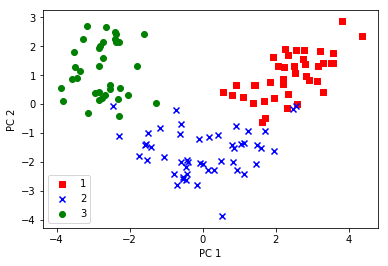

In [43]:
colors = ['r', 'b','g']
markers = ['s', 'x','o']
fig = plt.figure()
ax1 = fig.add_subplot(111)
print(y_train)
for l, c, m in zip(np.unique(y_train), colors, markers):
    print(l,c,m)
    ax1.scatter(X_train_pca[y_train == l, 0], X_train_pca[y_train == l,1], c=c, label=l, marker=m)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc = 'lower left')
plt.show()